# GridWorld Q-Learning

## Imports

In [66]:
# imports
import numpy as np
import matplotlib.pyplot as plt

## Defining the GridWorld Environment

In [67]:
class GridWorld:
    
    # initialize environment properties
    def __init__(self):
        # define grid dimensions and default reward values
        self.height = 5
        self.width = 5
        self.grid = np.full((self.height, self.width), -1)  # default reward is -1
        
        # set the agent's starting position at a random column in the bottom row
        self.current_location = (4, np.random.randint(0, 5))
        
        # define special locations: bomb (penalty) and gold (reward)
        self.bomb_location = (1, 3)
        self.gold_location = (0, 3)
        self.terminal_states = [self.bomb_location, self.gold_location]
        
        # assign rewards for special cells
        self.grid[self.bomb_location] = -10
        self.grid[self.gold_location] = 10
        
        # define available movement actions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    
    def get_available_actions(self):
        """Returns a list of possible actions the agent can take."""
        return self.actions
    
    def get_agent_location(self):
        """Returns a grid representation with the agent's current position marked."""
        grid = np.zeros((self.height, self.width))
        grid[self.current_location] = 1
        return grid
    
    def get_reward(self, position):
        """Returns the reward associated with a specific grid position."""
        return self.grid[position]
    
    def make_step(self, action):
        """Moves the agent in the specified direction. If at a border, stays in place and takes a penalty.
        Returns the reward for the move."""
        
        # store previous location
        last_location = self.current_location
        
        # movement logic based on chosen action
        if action == 'UP':
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (last_location[0] - 1, last_location[1])
                reward = self.get_reward(self.current_location)

        elif action == 'DOWN':
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (last_location[0] + 1, last_location[1])
                reward = self.get_reward(self.current_location)

        elif action == 'LEFT':
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (last_location[0], last_location[1] - 1)
                reward = self.get_reward(self.current_location)

        elif action == 'RIGHT':
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (last_location[0], last_location[1] + 1)
                reward = self.get_reward(self.current_location)
                
        return reward
    
    def check_state(self):
        """Checks if the agent is in a terminal state (gold or bomb). If so, returns 'TERMINAL'."""
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

## Defining the Random Agent

In [68]:
class RandomAgent(): 
           
    def choose_action(self, available_actions):
        """Returns a randomly selected action from the available ones."""
        return np.random.choice(available_actions)

## Defining the Q-Learning Agent

In [69]:
class Q_Agent():

    # initialize agent parameters and Q-table
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1):
        self.environment = environment
        self.epsilon = epsilon  # exploration rate
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.q_table = {}  # dictionary to store Q-values
        
        # initialize Q-table with zero values
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x, y)] = {'UP': 0, 'DOWN': 0, 'LEFT': 0, 'RIGHT': 0}

    def choose_action(self, available_actions):
        """Selects an action using an epsilon-greedy policy.
        With probability epsilon, selects a random action; otherwise, chooses the best action based on Q-values."""
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(available_actions)
        else:
            q_values = self.q_table[self.environment.current_location]
            max_value = max(q_values.values())
            return np.random.choice([action for action, value in q_values.items() if value == max_value])
    
    def learn(self, old_state, reward, new_state, action):
        """Updates the Q-value table using the Q-learning update rule."""
        max_q_value = max(self.q_table[new_state].values())
        current_q_value = self.q_table[old_state][action]
        
        self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value)

## Defining the Game Simulation Function

In [70]:
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
    """Runs multiple episodes in the environment.
    If learning is enabled, updates Q-values after each step."""
    
    reward_per_episode = []  # store cumulative rewards per episode
    
    for trial in range(trials):  # loop through each episode
        cumulative_reward = 0
        step = 0
        game_over = False
        
        while step < max_steps_per_episode and not game_over:
            old_state = environment.current_location
            action = agent.choose_action(environment.actions)
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            if learn:
                agent.learn(old_state, reward, new_state, action)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL':  # reset environment if in terminal state
                environment.__init__()
                game_over = True     
                
        reward_per_episode.append(cumulative_reward)  # store total reward of the episode
        
    return reward_per_episode  # return learning performance

## Training and Testing the Random Agent

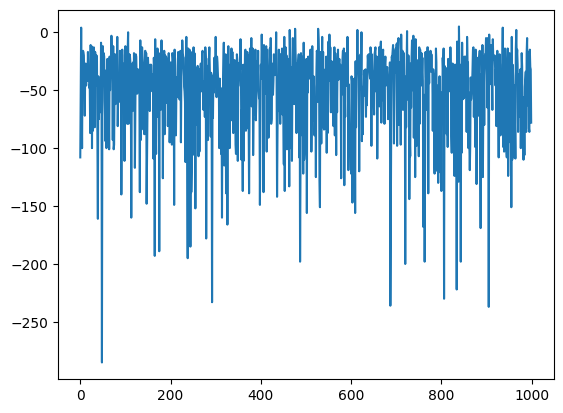

In [71]:
environment = GridWorld()
random_agent = RandomAgent()

reward_per_episode = play(environment, random_agent, trials=1000)

# plot learning curve
plt.plot(reward_per_episode)

## Training and Testing the Q-Learning Agent

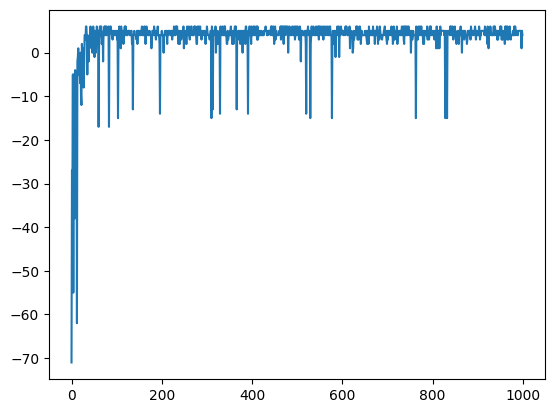

In [72]:
environment = GridWorld()
agentQ = Q_Agent(environment)

# note the learn=True argument
reward_per_episode = play(environment, agentQ, trials=1000, learn=True)

# plot learning curve
plt.plot(reward_per_episode)

## 